# Hiyerarşik Kümeleme Analizi (Hierarchical Cluster Analysis)

Amaç gözlemleri birbirlerine olan benzerliklerine göre alt kümelere ayırmaktır. Hiyerarşik kümeleme yöntemi aşağıya doğru ya da yukarıya doğru, yani birleştirici (agglomerative) ya da bölümleyici (divisive) şekilde gözlem birimlerini kümelere sokmaya dayanmaktadır. 

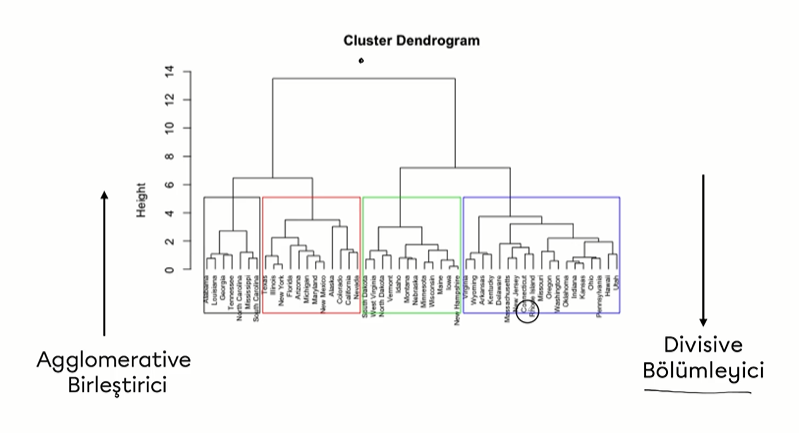

Aşağıda yazılan küçük yazılar bizim veri setimizdeki eyaletlerdir. Birleştirici yöntem açısından bakacak olursak, sol başta iki eyalet bir araya gelerek bir küme oluşturmuşlar. Sağındaki iki eyalet de bir küme oluşturmuşlar. Daha sonra bu iki küme de kendi aralarında bir küme oluşturmuşlar. Böyle böyle eyaletler kendi aralarında birleşerek kümelenmişlerdir.

Anlaşılacağı üzere buradaki temel çalışma prensibi, aşağıdan yukarıya ya da yukarıdan aşağıya şekilde hiyerarşik bir formda gözlem birimlerinin kümeye ayrılmasıdır.

*Bu yöntemin k-means'ten ne farkı vardır?*

K-means'te küme oluşturma sürecine dışarıdan müdahale edemiyorduk. Dolayısıyla bir gözlemleme imkanımız yoktu. Fakat burada belirli noktalardan çizgiler çekerek görsel teknik üzerinden çeşitli kümelenme seviyelerinde yeni kümelenmeleri tanımlayabiliyoruz.

## Hierarchical Clustering

In [2]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
#from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#warnings.simplefilter(action='ignore', category=Warning)

In [3]:
df = pd.read_csv("../datasets/USArrests.csv", index_col=0)

Burada da k-means yönteminde yaptığımız gibi verileri standartlaştırmamız gerekiyor.

In [4]:
sc = MinMaxScaler((0, 1))
df = sc.fit_transform(df)

In [5]:
# linkage birleştirici bir clustering yöntemi, öklid uzaklığına göre gözlem birimlerini kümelere ayırıyor
hc_average = linkage(df, "average")

Hiyerarşik kümeleme yönteminin temel noktası temel yapıtaşı, *dendrogram* adını verdiğimiz kümeleme yapısını gösteren şemadır. Bu şemayı oluşturmak için dendrogram metodunu kullanmamız gerekiyor.

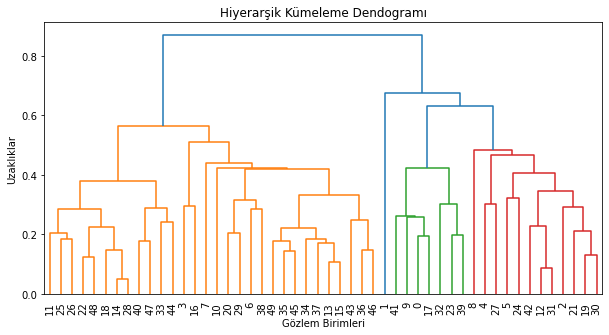

In [6]:
plt.figure(figsize=(10, 5))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average, leaf_font_size=10)
plt.show()

Burada kendi yorumumuza ve değerlendirmemize göre ne kadar küme barındırmamız gerektiğine karar verebiliriz. 

Peki biz burada daha az sayıda gözlem görmek istersek, örneğin mesela 10 küme veya 5 küme olsun gibi bir ayar girip buna göre gözlemlemek istersek:

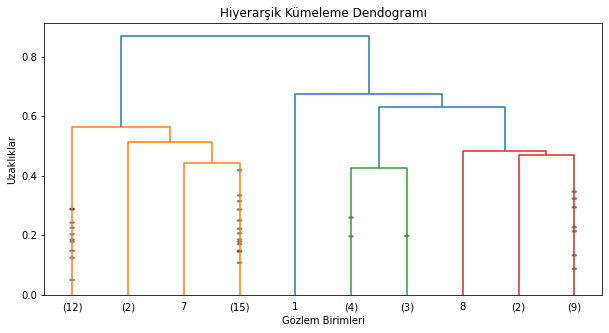

In [7]:
plt.figure(figsize=(10, 5))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average,
          truncate_mode="lastp",
          p=10,
          show_contracted=True,
          leaf_font_size=10)
plt.show()

Her bir kolda kaç tane gözlem birimi olduğunun bilgisini bu şekilde görebiliriz.

Hiyerarşik kümeleme yönteminin avantajı bize gözlem birimlerine genelden bakma şansı tanımasıdır. Ve buna göre çeşitli karar noktalarına dokunabilme şansı tanımasıdır.

### Küme Sayısını Belirlemek

Dendrogram diyaramı üzerinde görsel bir şekilde çizdiğimiz çizgiler ile küme sayısını belirleyebiliyorduk. Peki bunu programatik bir şekilde yapabilir miyiz? 

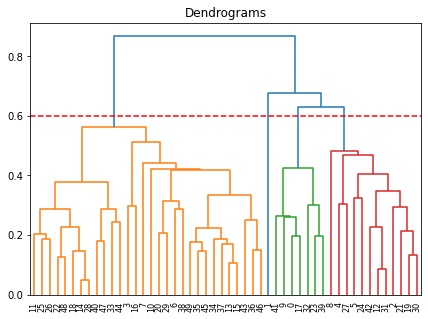

In [9]:
plt.figure(figsize=(7, 5))
plt.title("Dendrograms")
dend = dendrogram(hc_average)
plt.axhline(y=0.6, color='r', linestyle='--') # y üzerinde belirli bir eksende çizecek olduğumuz çizgi
plt.show()

Görüldüğü üzere y ekseninde 0.6 noktasından çizgiyi çektik. Peki birden fazla çizgi çekebilir miyiz?

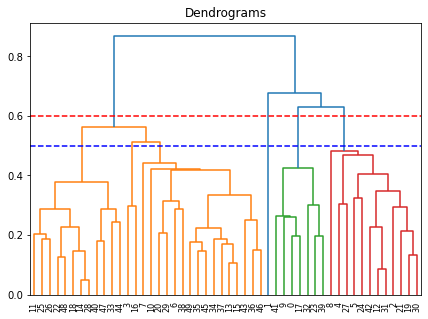

In [10]:
plt.figure(figsize=(7, 5))
plt.title("Dendrograms")
dend = dendrogram(hc_average)
plt.axhline(y=0.6, color='r', linestyle='--')
plt.axhline(y=0.5, color='b', linestyle='--')# y üzerinde belirli bir eksende çizecek olduğumuz çizgi
plt.show()

Bu çizgilerin kestiği çizgi sayısı kadar kümelerimiz oluşmuş olur. Mesela örnek olarak mavi çizgiyi incelediğimizde verilerimiz 6 farklı kümeye ayrılmış. Fakat 2. kümeye baktığımızda hemen hemen sınırdan kümeler ayrılmış, dolayısıyla oradaki kümeyi ayırmak yerine tek bir küme olarak alabiliriz. Yani 0.5 noktasından kestiğimiz çizgiye göre verilerimizi 5 farklı kümeye ayırmamız gerekirmiş.

Küme sayımıza karar verdiğimize göre final modelimizi oluşturabiliriz.

### Final Model

In [12]:
from sklearn.cluster import AgglomerativeClustering

In [14]:
cluster = AgglomerativeClustering(n_clusters=5, linkage="average")

Yukarıdaki küme sayımızın 5 olması gerektiğine karar verdiğimizden dolayı burada n_clusters parametresine 5 değerini giriyoruz. Linkage parametresinin ön tanımlı değeri ward'dur. En çok kullanılan değerler average ve ward.
(Ön tanımlı uzaklık metriği öklid.)

Modeli kurduktan sonra fit ifadesini kullanarak modeli eğitebiliriz fakat burada farklı olarak fit_predict ifadesini kullanacağız. Böylece hem eğitme işlemini hem de tahmin işlemini aynı anda yapmış oluruz.

In [16]:
clusters = cluster.fit_predict(df)

In [17]:
clusters

array([3, 2, 1, 0, 1, 1, 0, 0, 1, 3, 0, 4, 1, 0, 4, 0, 0, 3, 4, 1, 0, 1,
       4, 3, 1, 4, 4, 1, 4, 0, 1, 1, 3, 4, 0, 0, 0, 0, 0, 3, 4, 3, 1, 0,
       4, 0, 0, 4, 4, 0], dtype=int64)

Görüldüğü üzere 5 cluster için değerler gelmiş oldu. Şimdi dfmimizi baştan okuyup buradaki elde ettiğimiz sınıf değerlerini df içerisine ekleyeceğiz.

In [28]:
df = pd.read_csv("../datasets/USArrests.csv", index_col=0)

In [19]:
df["hi_cluster_no"] = clusters

In [20]:
df.head()

,Murder,Assault,UrbanPop,Rape,hi_cluster_no
Alabama,13.2,236,58,21.2,3
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,1


0 sınıfının değişkende olması istemezsek buradaki değerler 1 ekleyebiliriz.

In [21]:
df["hi_cluster_no"] = df["hi_cluster_no"] + 1

In [22]:
df.head()

,Murder,Assault,UrbanPop,Rape,hi_cluster_no
Alabama,13.2,236,58,21.2,4
Alaska,10.0,263,48,44.5,3
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,2


-------

Yukarıda df içerisine hem hierarchical clusterdan elde ettiğimiz sınıfları, hem de kmeans'den elde ettiğimiz sınıfları aynı df içerisine ekleyerek, ikisinin de aynı sınıfa soktuğu kaç veri var ve farklı olan sınıflandırmalar neden farklı araştırmasını yapabiliriz.